## Решение оптимизационных задач в SciPy

In [150]:
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from scipy import optimize
from scipy.optimize import minimize

### Минимизируемые функции

In [151]:
def fun1(x): # квадратическая функция
    return x[0]**2 + 4*x[1]**2

def fun2(x): # эллиптическая функция
    return x[0]**2 + 10*x[1]**4 - 3*x[0] - 6*x[1]

def fun3(x): # The rosenbrock 4-dim function
    x = np.array(x)
    s = (1 - x[0])**2
    for i in range(len(x) - 1):
        s += 100 * (x[i+1] - x[i]**2)**2
    return s

def rosen(x): # The rosenbrock function
    x = np.array(x)
    return sum(100.0*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2)

def fun4(x): # многоэкстремальная фунцкия
    return (x[0]**2 + x[1]**2 - 11)**2 + (x[0] + x[1]**2 - 7)**2

def fun5(x): # гиперэкстремальная функция Экли
    return 20 - 20*np.exp(-0.2*np.sqrt(0.5*(x[0]*x[0] + x[1]*x[1]))) - np.exp(0.5*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))) + np.exp(1)

def fun6(x): # квадратическая функция
    x = np.array(x)
    return np.sum(x*x)

def fun7(x): # эллиптическая функция
    x = np.array(x)
    s = 0
    for i in range(len(x)):
        s += (i+1) * x[i]**2
    return s

def fun8(x): # плохо обусловленная эллиптическая функция
    x = np.array(x)
    s = 0
    for i in range(len(x)):
        s += (i+1)**2 * x[i]**2
    return s

In [152]:
x = np.array((1,2,3))
x[1:] + x[:-1]

array([3, 5])

### Методы оптимизации 0-го порядка

In [153]:
f = fun3
print(f([-1, 1]), f([0, 0]), f([1, 1]))

4 1 0


In [154]:
res = optimize.differential_evolution(f, ((-5, 5), (-5, 5)))
print(res)

     fun: 4.979684464207637e-30
 message: 'Optimization terminated successfully.'
    nfev: 4023
     nit: 133
 success: True
       x: array([1., 1.])


In [155]:
x0 = np.array([-1.3, 0.7, -0.8])
res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, "disp": True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 215
         Function evaluations: 385
 final_simplex: (array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([1.0850e-17, 1.1919e-17, 1.8953e-17, 2.0818e-17]))
           fun: 1.0850406632397311e-17
       message: 'Optimization terminated successfully.'
          nfev: 385
           nit: 215
        status: 0
       success: True
             x: array([1., 1., 1.])


In [156]:
print(dir(res))

['final_simplex', 'fun', 'message', 'nfev', 'nit', 'status', 'success', 'x']


In [157]:
resdict = res.items()
print(resdict)

dict_items([('fun', 1.0850406632397311e-17), ('nit', 215), ('nfev', 385), ('status', 0), ('success', True), ('message', 'Optimization terminated successfully.'), ('x', array([1., 1., 1.])), ('final_simplex', (array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([1.0850e-17, 1.1919e-17, 1.8953e-17, 2.0818e-17])))])


In [158]:
def store(r):
    x, y = r
    all_x_i.append(x)
    all_y_i.append(y)
    all_f_i.append(f(r))

all_x_i = [x0[0]]
all_y_i = [x0[1]]
all_f_i = [f(x0)]

x0 = [-2, 2]
res = minimize(f, x0, method='nelder-mead', callback=store)
print(res)

 final_simplex: (array([[1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 0.9999]]), array([3.9243e-10, 5.1113e-10, 1.4805e-09]))
           fun: 3.9243120800385976e-10
       message: 'Optimization terminated successfully.'
          nfev: 208
           nit: 112
        status: 0
       success: True
             x: array([1., 1.])


In [159]:
for ii in range(0, min(len(all_i_x), 51), 5):
    ff = all_i_f[ii]
    print("ii={:d} f(ii)={:10.5f}".format(ii, ff))

ii=0 f(ii)= 409.00000
ii=5 f(ii)=   8.58250
ii=10 f(ii)=   6.49626
ii=15 f(ii)=   6.28025
ii=20 f(ii)=   5.27691
ii=25 f(ii)=   3.96558
ii=30 f(ii)=   3.29268
ii=35 f(ii)=   2.40701
ii=40 f(ii)=   1.60020
ii=45 f(ii)=   1.07195
ii=50 f(ii)=   0.57469


### Методы оптимизации 1-го порядка

In [160]:
# если вы вычисляете производную сами, то неплохо проверить правильность ваших вычислений с помощью метода check_grad

def rosen_der(x): # вычисление производной
    x = np.array(x)
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def rd(x):
    x = np.array(x)
    d = np.zeros_like(x)
    d[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    for i in range(1, len(x)-1):
        d[i] = 200*(x[i]-x[i-1]**2) - 400*x[i]*(x[i+1]-x[i]**2) - 2*(1-x[i])
    d[-1] = 200*(x[-1]-x[-2]**2)
    return d

# print(optimize.check_grad(rosen, rosen_der, [-2, 2]))
print(optimize.check_grad(rosen, rosen_der, [-2, 2, 2]))
print(optimize.check_grad(rosen, rosen_der, [-2, 2, 3, 4, 5]))

print(f'\nrd([-2,2]) = {rd([-2,2])}')
print(optimize.check_grad(rosen, rd, [-2, 2]))
print(f'\nrd([-2,2,2]) = {rd([-2,2,2])}')
print(optimize.check_grad(rosen, rd, [-2, 2, 2]))
print(f'\nrd([-2, 2, 3, 4, 5]) = {rd([-2, 2, 3, 4, 5])}')
print(optimize.check_grad(rosen, rd, [-2, 2, 3, 4, 5]))

3.2368779656366614e-05
3417.6013838290173

rd([-2,2]) = [-1606  -400]
2.288818359375e-05

rd([-2,2,2]) = [-1606  1202  -400]
3.2368779656366614e-05

rd([-2, 2, 3, 4, 5]) = [-1606   402  5804 16606 -2200]
0.0001220703125


In [161]:
r0 = [-2, 2]
print(rd(r0))

all_x_i = [r0[0]]
all_y_i = [r0[1]]
all_f_i = [f(r0)]

res = optimize.minimize(f, r0, method='BFGS', jac = rd, callback=store)
print(res)
for ii in range(0, len(all_x_i), 5):
    ff = all_f_i[ii]
    print('ii = {:d} f(ii) = {:10.5f}'.format(ii, ff))



[-1606  -400]
      fun: 9.817296945739454e-14
 hess_inv: array([[0.481 , 0.9599],
       [0.9599, 1.9203]])
      jac: array([-8.7584e-06,  4.5924e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 35
     njev: 42
   status: 0
  success: True
        x: array([1., 1.])
ii = 0 f(ii) =  409.00000
ii = 5 f(ii) =    1.79377
ii = 10 f(ii) =    1.54867
ii = 15 f(ii) =    0.70610
ii = 20 f(ii) =    0.16800
ii = 25 f(ii) =    0.02788
ii = 30 f(ii) =    0.00011
ii = 35 f(ii) =    0.00000


### draw

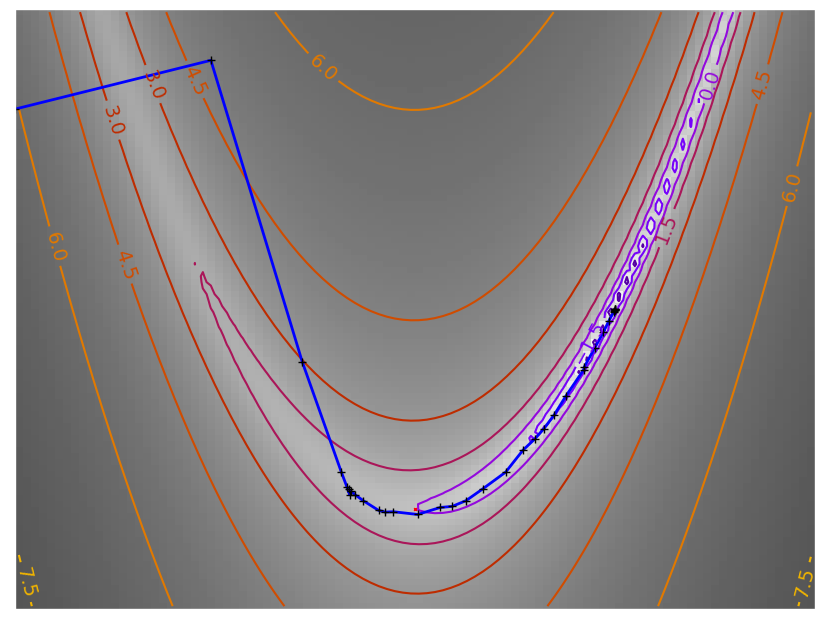

In [162]:
%matplotlib inline

x_min, x_max = -2, 2
y_min, y_max = 2.25 / 3 * x_min + 1, 2.25 / 3 * x_max + 1

if not max(all_y_i) < y_max:
    x_min *= 1.2
    x_max *= 1.2
    y_min *= 1.2
    y_max *= 1.2

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
x = x.T
y = y.T

plt.figure(figsize=(8,6))
plt.clf()
plt.axes([0, 0, 1, 1])

X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
z = np.apply_along_axis(f, 0, X)
log_z = np.log(z + .01)

plt.imshow(log_z,
            extent = [x_min, x_max, y_min, y_max],
            cmap = plt.cm.gray_r,
            origin = 'lower',
            vmax = log_z.min() + 1.5*log_z.ptp())
contours = plt.contour(log_z,
            extent = [x_min, x_max, y_min, y_max],
            cmap = plt.cm.gnuplot,
            origin = 'lower')

plt.clabel(contours, inline=1, fontsize=14)

plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
plt.plot(all_x_i, all_y_i, 'k+')

plt.plot([0], [0], 'rx', markersize=2)

plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.draw()

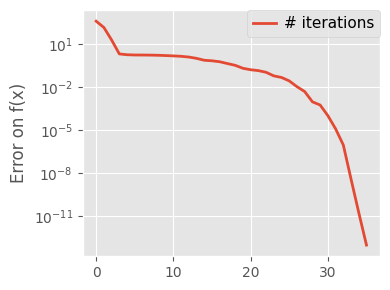

In [163]:
plt.figure(150, figsize=(4, 3))
plt.clf()
plt.semilogy(np.maximum(np.abs(all_f_i), 1e-30), linewidth=2, label='# iterations')
plt.ylabel('Error on f(x)')
plt.legend(loc='upper right', frameon = True, prop=dict(size=11), borderaxespad=0, handlelength=1.5, handletextpad=.5)
plt.tight_layout()
plt.draw()

In [184]:
def rosen(x):
    return np.sum(10.0*(x[1:]-x[-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

In [185]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X= [[-2.  -1.9 -1.8 -1.7 -1.6]
 [-2.  -1.9 -1.8 -1.7 -1.6]
 [-2.  -1.9 -1.8 -1.7 -1.6]
 [-2.  -1.9 -1.8 -1.7 -1.6]
 [-2.  -1.9 -1.8 -1.7 -1.6]]
Y= [[-1.  -1.  -1.  -1.  -1. ]
 [-0.9 -0.9 -0.9 -0.9 -0.9]
 [-0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.7 -0.7 -0.7 -0.7 -0.7]
 [-0.6 -0.6 -0.6 -0.6 -0.6]]
XY.shape = (2, 40, 40)
Z.shape = (40, 40)


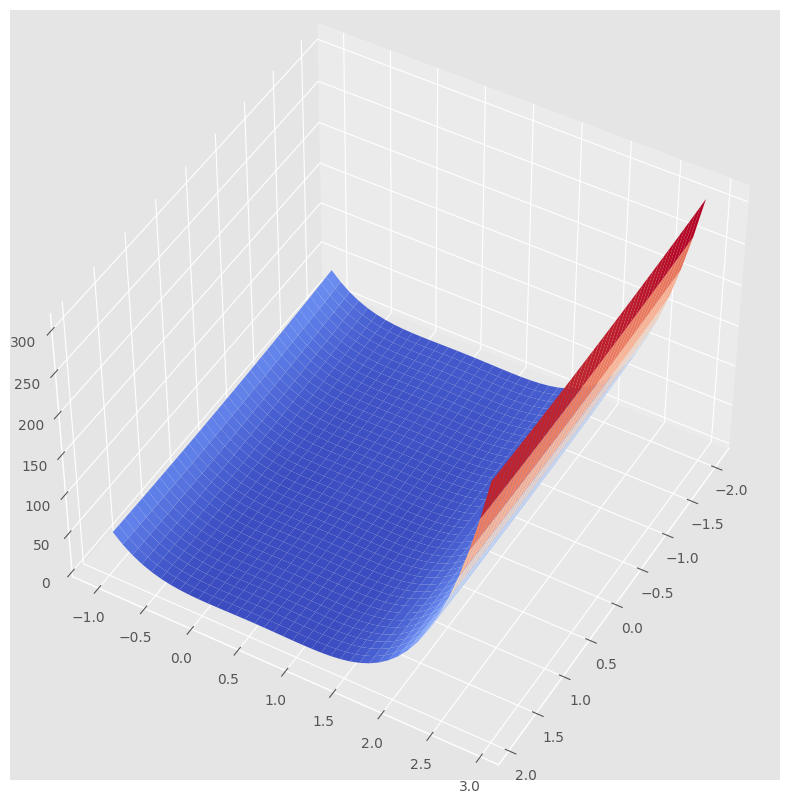

In [186]:
# Настраиваем 3D-график
fig = plt.figure(figsize=[15,10])
# ax = fig.gca(projection ='3d')
ax = fig.add_subplot(projection ='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
print('X=', X[0:5, 0:5])
print('Y=', Y[0:5, 0:5])
XY = np.array([X, Y])
print('XY.shape =', XY.shape)
Z = rosen(XY)
print('Z.shape =', Z.shape)

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [187]:
def f(x):
    return sum(x*x)

f(np.array([1,2,3]))

14

In [188]:
def partial_df(f, x0, dx):
    grad=[]
    f0 = f(x0)
    for i in range(len(x0)):
        x1 = x0.copy()
        x1[i] += dx
        grad.append((f(x1)-f0)/dx)
    return np.array(grad)

partial_df(f, x0=np.array([1,2,3]), dx=1e-3)

array([0., 0., 0.])